# <center>Кластеризация на основе плотности</center>
>Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются **шумом**.

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Данный алгоритм применим, если:
* перед вами стоит задача с данными сложной формы, например выделение районов на карте:

    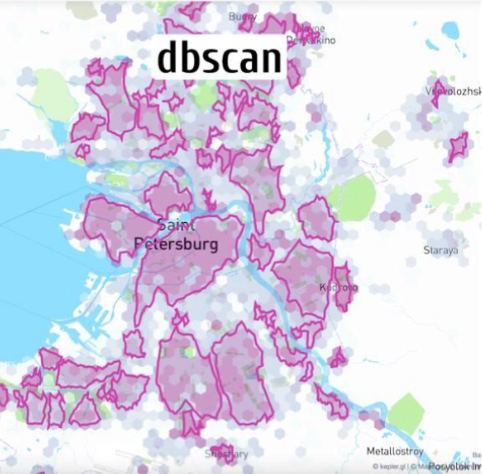
* в данных большое количество выбросов, например данные медицинских анализов пациентов.
>**Преимущества алгоритма DBSCAN:**
>* В отличие от *k-means*, не нужно задавать количество кластеров — алгоритм сам определит оптимальное.
>* Алгоритм хорошо работает с данными произвольной формы
>* *DBSCAN* отлично справляется с выбросами в датасетах

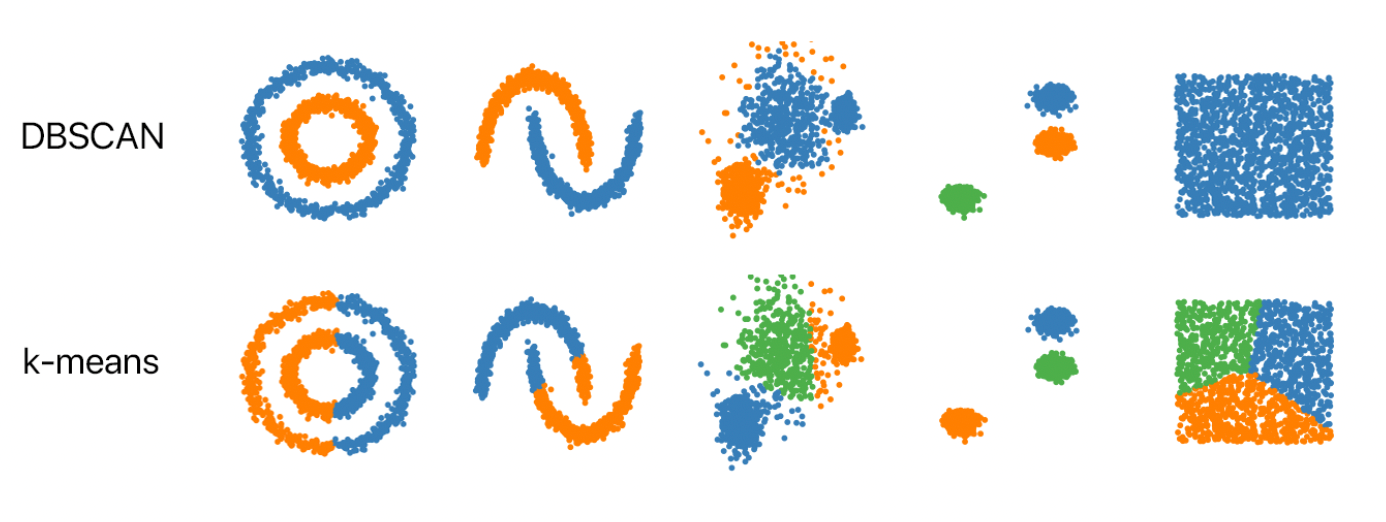

Допустим, у нас есть признаки $X=\{x_1, x_2\}$ (значения роста и веса людей). Если визуализировать эти данные, становится понятно, что их можно разделить на два кластера, а также наблюдаются выбросы (серые точки):

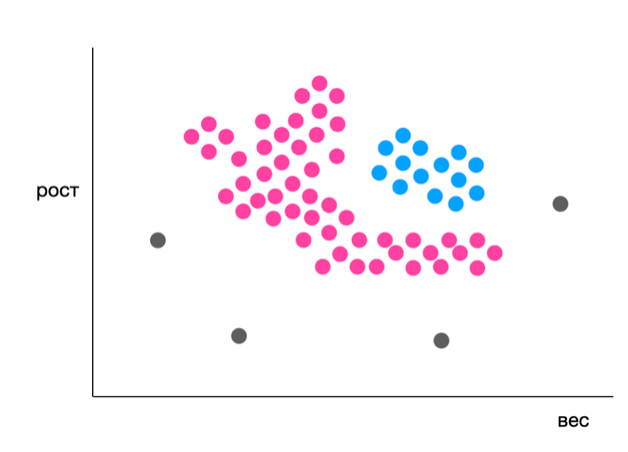

Так как розовый кластер огибает синий, у стандартных методов вроде k-means могут быть трудности при кластеризации. При использовании k-means мы можем получить следующие результаты:

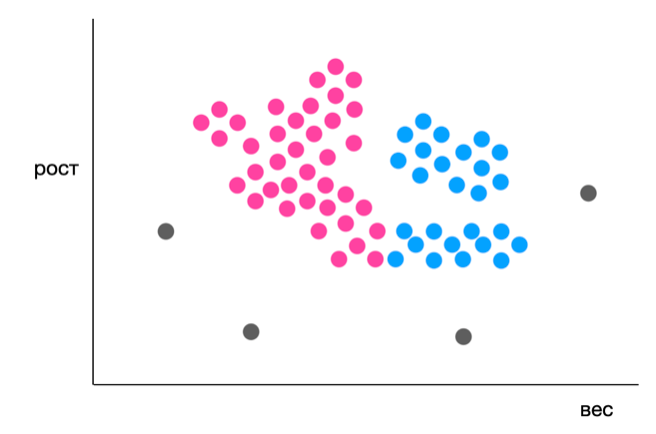

**Алгоритм DBSCAN:**
1. Сначала необходимо выбрать случайный объект в данных (на рисунке выбранная точка выделена красным) и в некотором радиусе $r$ от этой точки найти всех соседей. На рисунке окружность выделена оранжевым цветом, а соседи — это все те точки, что попадают в оранжевую окружность. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. В данном случае точек пять:

    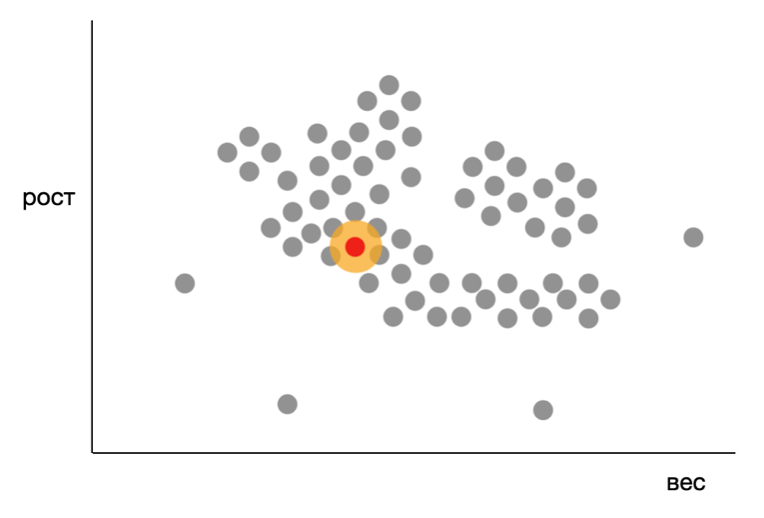

    Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.

    Посмотрим на одну из точек, которая находится в отдалении от всех других. Можно заметить, что в заданном радиусе у неё нет никаких соседей:

    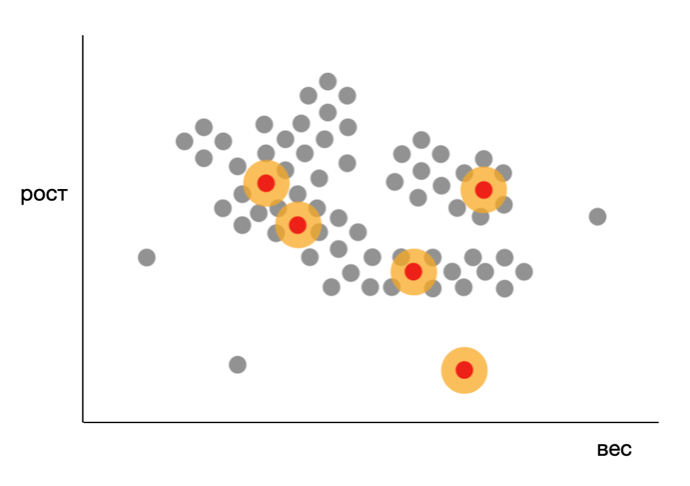
2. Выделим центральные точки (core points).
    >**Центральными** будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.

    В наших данных четыре выделенные точки (красные точки на картинке выше) будут считаться центральными, так как вокруг них расположено три и более точек. Пятая красная точка не будет считаться центральной, так как вокруг неё нет соседей.

    Находим центральные точки во всём датасете. Это будет выглядеть так:

    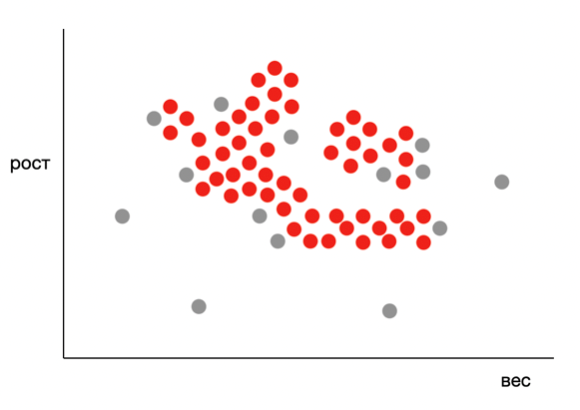
3. Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки:

    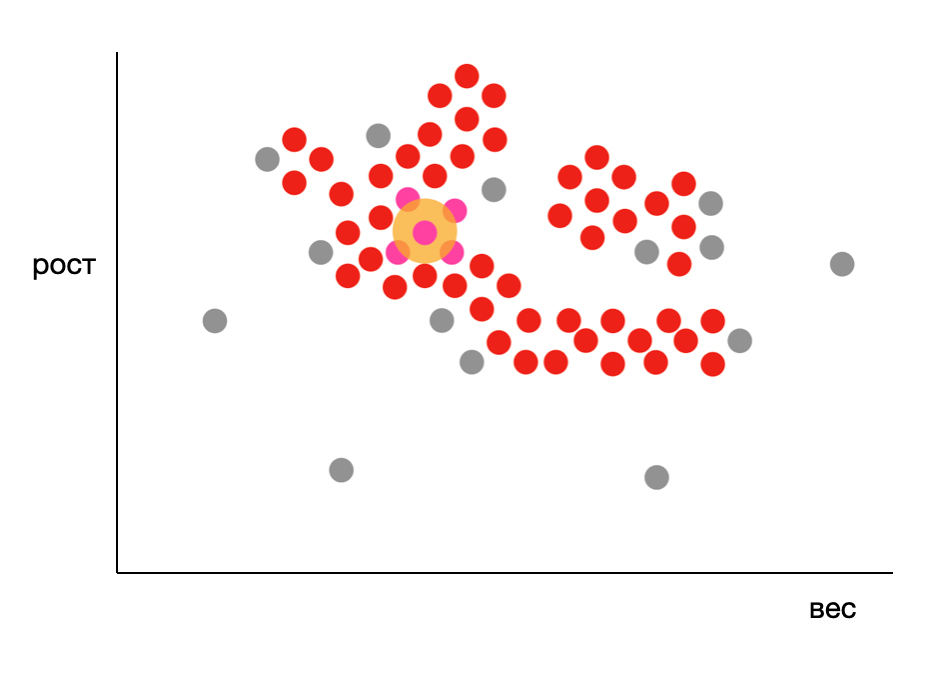

    Они также будут отнесены к первому кластеру. На рисунке выше эти точки выделены розовым.

    Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка не будет добавлена в кластер. Таким образом, мы получили первый, розовый, кластер:

    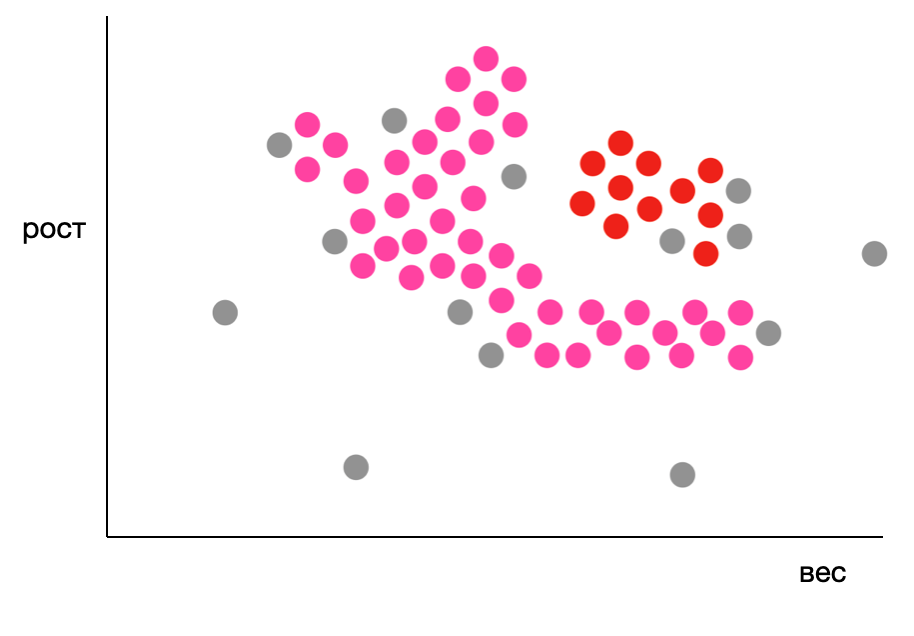

4. После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе $r$ от объектов, принадлежащих первому кластеру. На рисунке ниже эти точки указаны стрелкой и теперь тоже принадлежат к кластеру 1:

    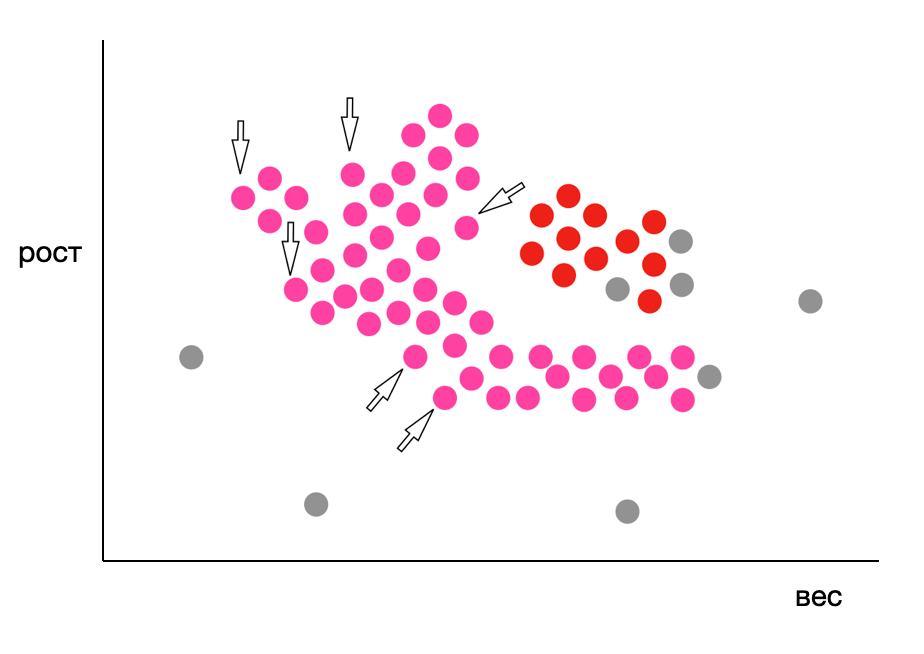
5. Далее переходим к неразмеченной области в данных (второй кластер с красными точками). Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй, синий, кластер:

    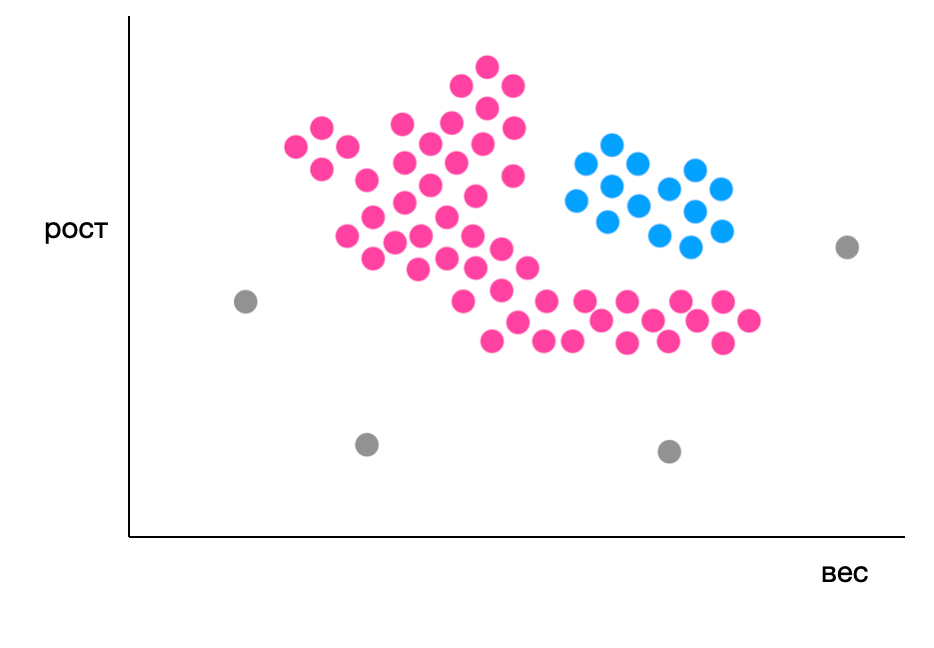

    Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру. На рисунке выше они обозначены серым.

### Для каких задач используется DBSCAN:
* Можно использовать DBSCAN для разработки системы рекомендаций в магазине. Если мы точно не знаем, на какие группы можно разделить пользователей, то на основе того, что покупают люди, можно провести DBSCAN-кластеризацию.
* Данный алгоритм успешно справляется с поиском выбросов в данных. Рассмотренные ранее алгоритмы кластеризации, в отличие от DBSCAN, не выделяют выбросы в отдельные объекты.
* Часто DBSCAN применяют для кластеризации геоданных, так как он может выделять данные сложной формы.


### **Преимущества DBSCAN:**
* Не нужно задавать количество кластеров.
* Устойчив к шуму и выбросам, может находить выбросы в данных.
* Способен найти кластеры любой геометрической формы.
### **Недостатки DBSCAN:**
* Не может качественно кластеризовать наборы данных с большой разницей в плотности.
* Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.
* Бывает сложно подобрать `eps`(радиус).
